# To Explore Supervised Machine Learning using Linear Regression

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. Supervised learning algorithms are trained using labeled examples, such as an input where the desired output is known.

## OVERVIEW OF LINEAR REGRESSION

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory/independent variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

A simple linear regression line has an equation of the form **Y = a + bX** where X is the explanatory variable and Y is the dependent variable. The slope of the line is b (the value with which Y changes when X increases by 1 unit), and a is the intercept (the value of Y when x = 0).

## TASK DETAILS

This task is meant for exploration of Supervised Machine Learning using Linear Regression. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied each day. This is a simple linear regression task as it involves just two variables.

The data can be found here: http://bit.ly/w-data

We now begin the task.

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will import the scikit learn library as and when required during the task. 
Let us now read our data.

In [2]:
# reading the data into a pandas DataFrame

student_data = pd.read_csv('http://bit.ly/w-data')

In [3]:
# checking the first five rows of our DataFrame

student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In [4]:
# checking for missing values

student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

The dataset contains no missing values.

In [5]:
# obtaining some more statistical information regarding our Data set

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The data set is small with no missing values. There are only two variables and hence it will be easy to visualize the reation between them using a scatter plot. 

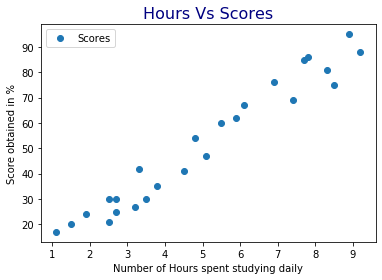

In [7]:
# plotting the distribution of our data set.

student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Scores', fontsize=16, color='navy' )
plt.xlabel('Number of Hours spent studying daily')
plt.ylabel('Score obtained in %')
plt.show()

**From the above graph, we can clearly see that there is positive correlation between the number of hours spent studying and the scores obtained by the student.**

Let us now try to plot a linear regression line on this data and see how it fits, visually.

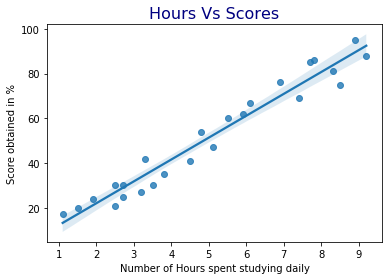

In [8]:
# plotting linear regression line on the data

sns.regplot(x='Hours', y='Scores', data=student_data)
plt.title('Hours Vs Scores', fontsize=16, color='navy')
plt.xlabel('Number of Hours spent studying daily')
plt.ylabel('Score obtained in %')
plt.show()

Now, let us try to fit a linear model on our data to obtain predictions. The model we will be using is Linear Regression from the scikit learn library.

## Preparing the data

We firstly divide the data into attributes (inputs) which will be denoted by **X**, and labels (outputs) which will be denoted by **y**. Here, we will use the number of hours studied to predict the percentage scores of the student.

In [9]:
X = student_data.drop('Scores', axis=1)
y = student_data['Scores']

Now that we have obtained our attributes and labels, we now split our data into training and testing data using scikit learn library on 75%-25% basis.

In [10]:
# importing the required function and splitting our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training the model

Now that we have our training and testing data, we proceed to train our model. We import the required functions and train our model.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# training our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our model has been trained successfully. Now we try to look at the equation of our linear model and further make predictions and visualize our model.

In [13]:
# obtaining the intercept and coefficient of our linear model

a = regressor.intercept_
b = regressor.coef_
print("The intercept is ", a)
print("The coefficient is ", b[0])

The intercept is  2.480367091505741
The coefficient is  9.714092192627646


In [14]:
# equation 
print('The equation of our trained linear model is: ')
print('y = ',a,' +',b[0],'X')

The equation of our trained linear model is: 
y =  2.480367091505741  + 9.714092192627646 X


## Making Predictions from the Model

In [15]:
y_predictions = regressor.predict(X_test)

In [16]:
# comparing the predicted values and actual values

pd.DataFrame({'Actual' : y_test, 'Predictions': y_predictions}).reset_index(drop=True)


,Actual,Predictions
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


**We now visualize the model's predictions (best fit line) on our training and testing data.**

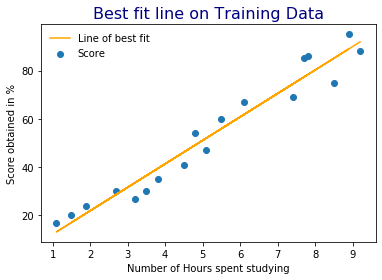

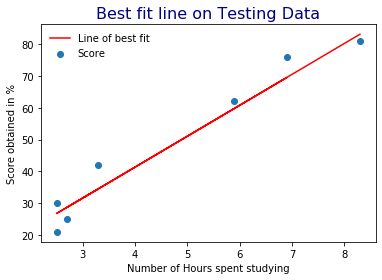

In [17]:
# visualizing the predictions with respect to our data 

# for training data
plt.scatter(X_train, y_train, label='Score')
plt.plot(X_train, regressor.predict(X_train), color='orange', label='Line of best fit')
plt.xlabel('Number of Hours spent studying')
plt.ylabel('Score obtained in %')
plt.title('Best fit line on Training Data', fontsize=16, color='navy')
plt.legend(frameon=False)
plt.show()

# for testing data
plt.scatter(X_test, y_test, label='Score')
plt.plot(X_test, y_predictions, color='red', label='Line of best fit')
plt.xlabel('Number of Hours spent studying')
plt.ylabel('Score obtained in %')
plt.title('Best fit line on Testing Data', fontsize=16, color='navy')
plt.legend(frameon=False)
plt.show()

**Errors (Residual) Histogram**

Let's check the distribution of errors in our predictions. Note that error/residual = y_test - y_predictions

Text(0.5, 1.0, 'Distribution of Errors')

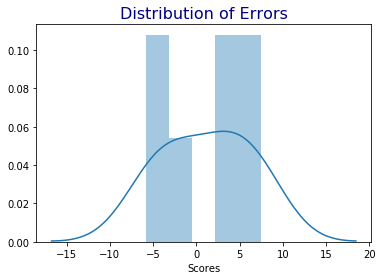

In [18]:
sns.distplot((y_test - y_predictions), bins=5)
plt.title('Distribution of Errors', fontsize=16, color='navy')

## Predicting for custom inputs

**What will be predicted score if a student studies for 9.25 hrs in a day?**

In [19]:
custom = np.array([9.25]).reshape(-1,1)
print('Number of Hours Studied:', custom[0][0])
print('Predicted Score in %: ', regressor.predict(custom)[0])

Number of Hours Studied: 9.25
Predicted Score in %:  92.33571987331146


## Evaluating the model

It is now time to evaluate the model's performance. 

### **Regression evaluation metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [20]:
# importing the metrics function
from sklearn import metrics

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error: 4.4253946751561815
Mean Squared Error: 23.516396034595214
Root Mean Squared Error: 4.849370684387327


According to the RMSE, there is an error of approximately 4.8 percent marks in prediction of scores.